In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%matplotlib inline

In [141]:
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [142]:
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [143]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [144]:
df.shape

(5000, 14)

In [145]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

all features are numerical values.

In [146]:
df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
92093     51
90245     50
90024     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
93407     26
        ... 
95482      2
91129      2
95307      2
95842      2
91784      2
96094      2
92116      2
94507      2
94575      2
90745      2
93033      2
94019      2
92161      2
91941      2
94116      2
95816      2
91326      2
92705      2
94604      2
90813      1
94404      1
94965      1
9307       1
91024      1
92694      1
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

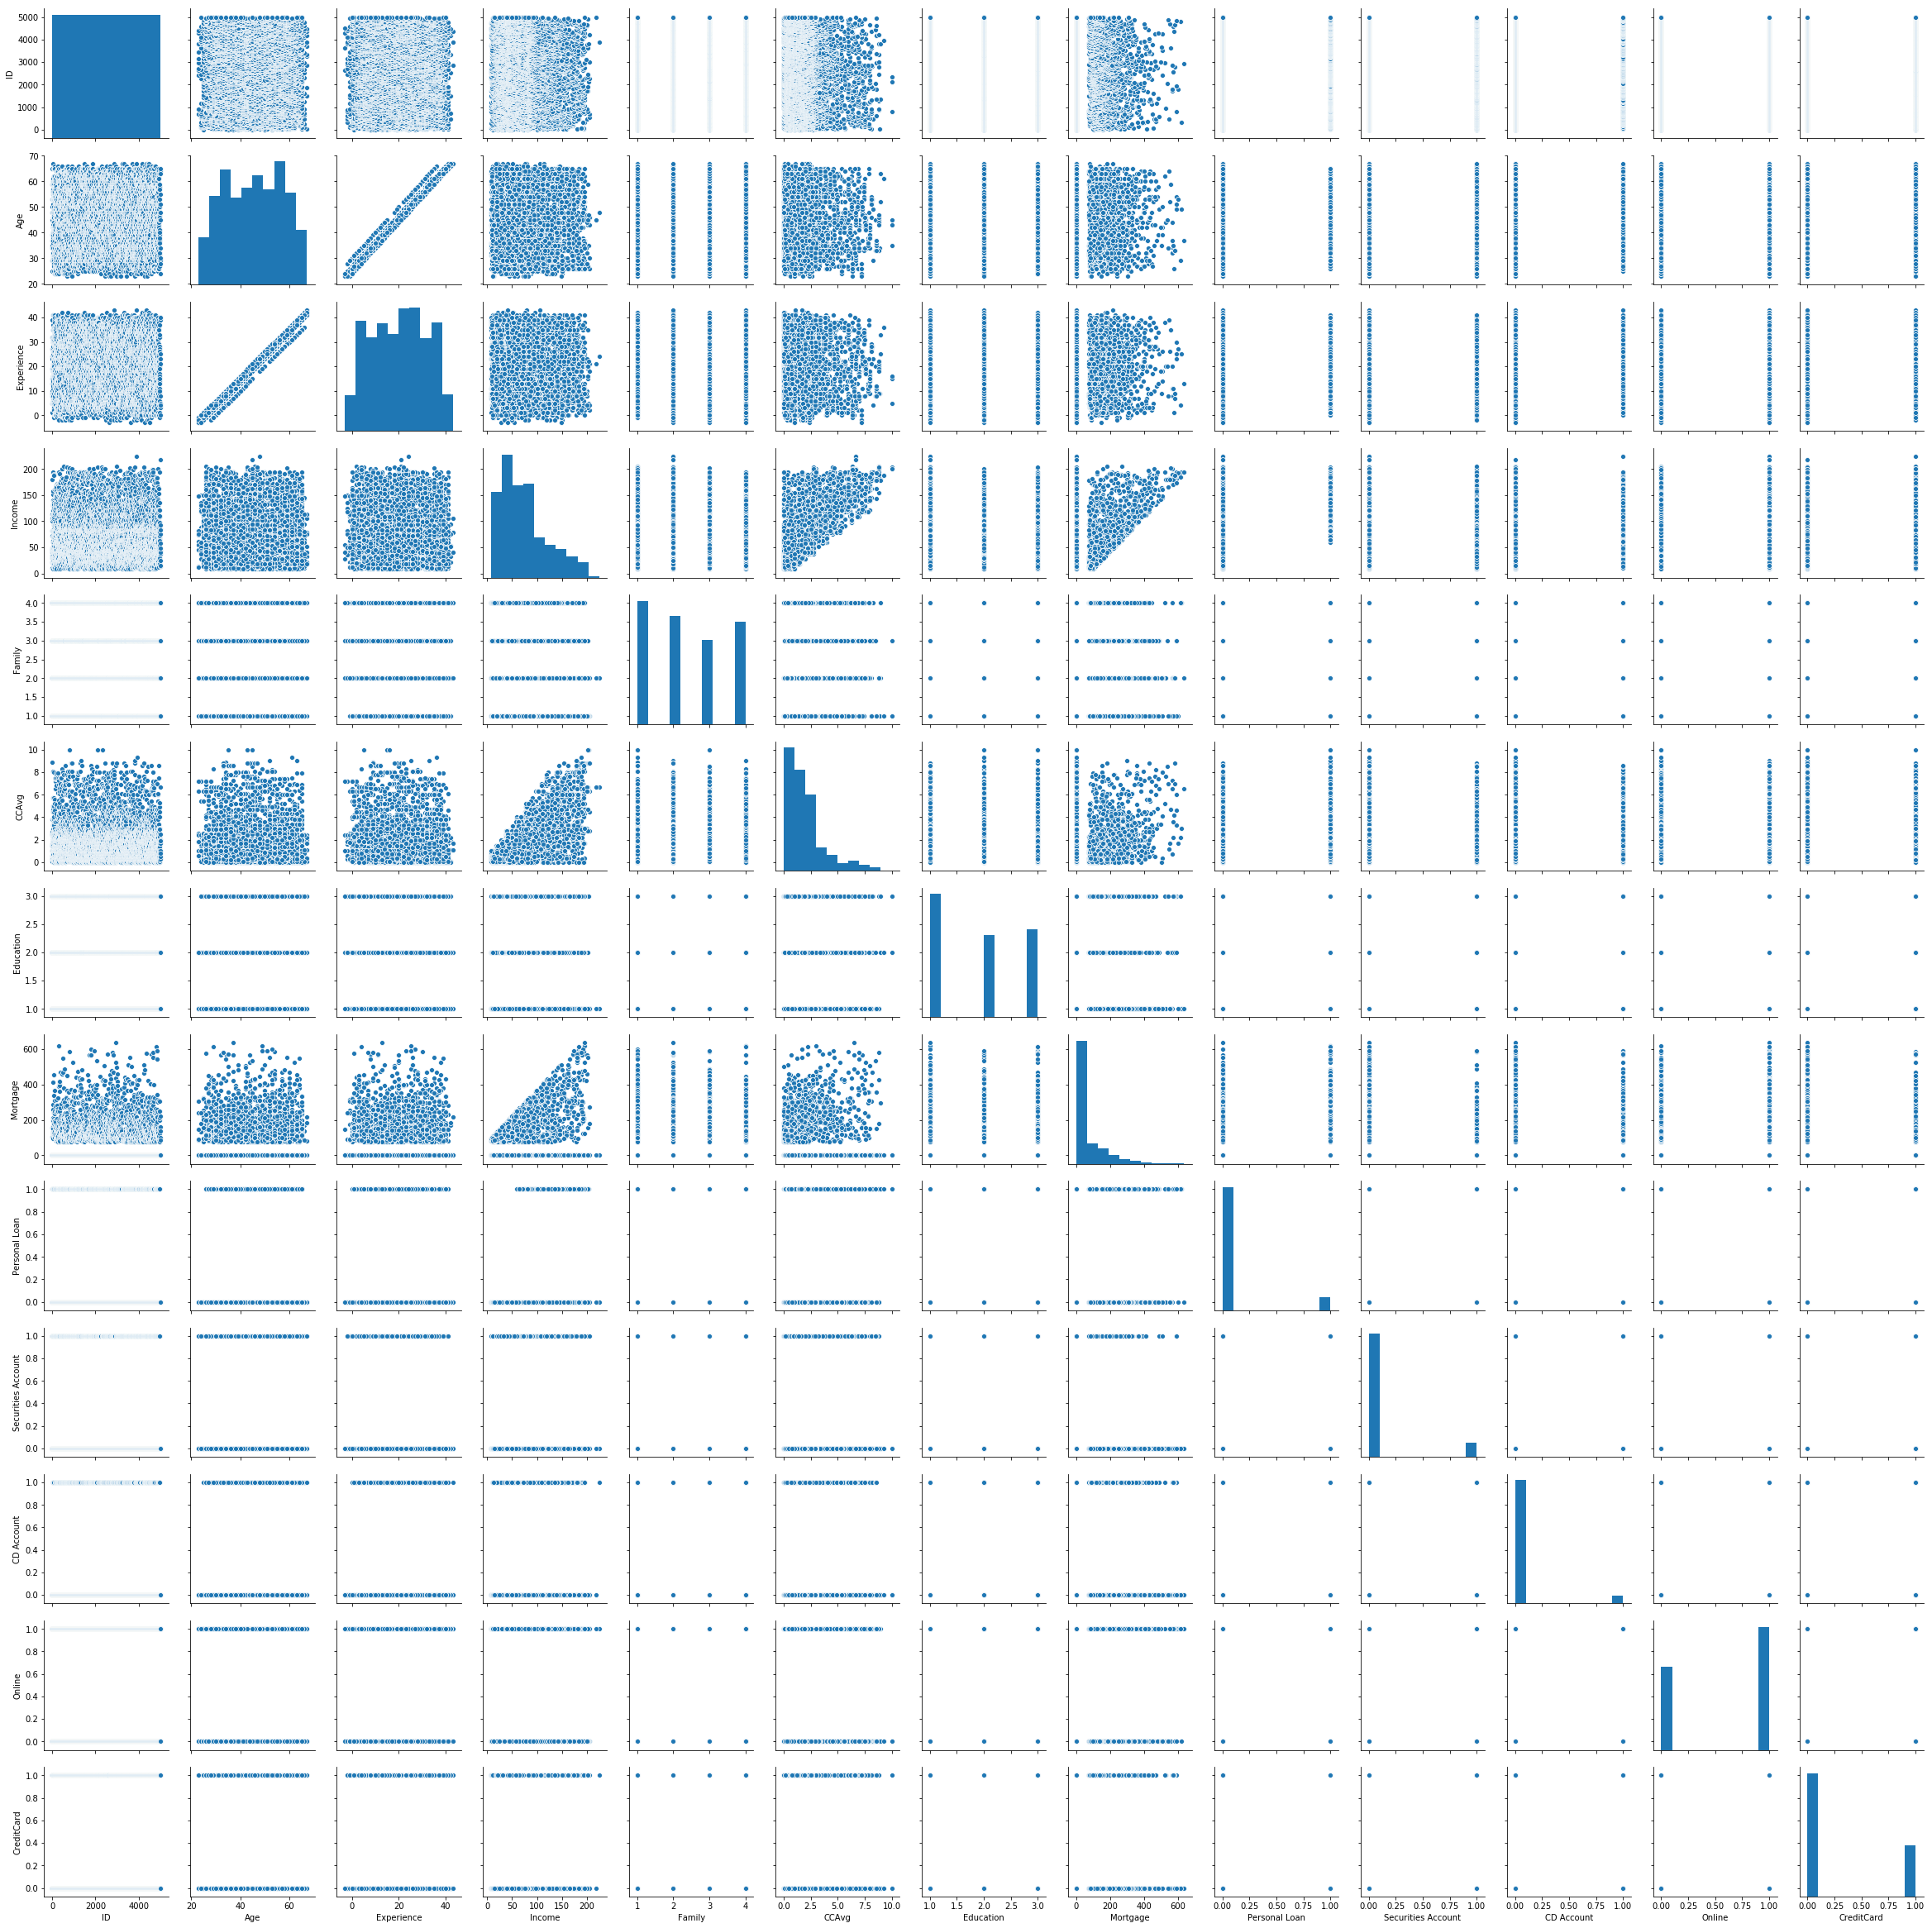

In [147]:
sns.pairplot(df.drop('ZIP Code' ,axis=1))

Age and Experience has a linear relation. so experience will be dropped to avoid multicolinearity.

In [148]:
df["ZIP Code"] = df["ZIP Code"].astype(str)

In [149]:
#Experience has negative value so we should clip it but as it has a linear relation with Age 
#hence we will drop Experience feature
#df['Experience'] = df['Experience'].clip(lower=0)

In [150]:
df.min()

ID                        1.0
Age                      23.0
Experience               -3.0
Income                    8.0
ZIP Code              90005.0
Family                    1.0
CCAvg                     0.0
Education                 1.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    0.0
CreditCard                0.0
dtype: float64

In [151]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values.

In [152]:
#checking for imbalances in classes for below columns
columns = ['Education','CD Account','Online','CreditCard','Personal Loan']
for i in columns:
    print(df[i].value_counts())
    print()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64



All input/output class data seems imbalanced. Proceeding without up/down sampling. Will check recall and precison along with accuracy.
Target column i.e Personal Loan has a imbalance with 4520 in class 0 and  480 in class 1

In [153]:
#df.corr()

In [154]:
# Dummy 1 / 0 matrix for Zip Code Variable
df_zip = pd.get_dummies(data = df['ZIP Code'], dummy_na = True)
df_zip = df_zip.rename(columns = {'91107' : '91107'})
df = pd.concat([df, df_zip.iloc[:, 0:467]], axis = 1)

In [155]:
## scaling all variables
df = df.drop('ZIP Code', axis=1).apply(zscore)
df.shape

(5000, 480)

In [156]:
X = df.drop(['Personal Loan','ID','Experience'] ,axis=1)
Y = df['Personal Loan'].astype(int)

In [157]:
xtrain, xtest,ytrain , ytest = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [158]:
xtrain.shape

(3500, 477)

In [159]:
ytrain.shape

(3500,)

In [160]:
xtest.shape

(1500, 477)

In [161]:
ytest.shape

(1500,)

In [162]:
df.dtypes

ID                    float64
Age                   float64
Experience            float64
Income                float64
Family                float64
CCAvg                 float64
Education             float64
Mortgage              float64
Personal Loan         float64
Securities Account    float64
CD Account            float64
Online                float64
CreditCard            float64
90005                 float64
90007                 float64
90009                 float64
90011                 float64
90016                 float64
90018                 float64
90019                 float64
90024                 float64
90025                 float64
90027                 float64
90028                 float64
90029                 float64
90032                 float64
90033                 float64
90034                 float64
90035                 float64
90036                 float64
                       ...   
95747                 float64
95758                 float64
95762     

In [163]:
model = LogisticRegression()

In [164]:
model.fit(xtrain, ytrain)

C:\Users\Nirmalya Misra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
y_pred = model.predict(xtest)

In [166]:
model.score(xtest,ytest)

0.934

In [167]:
a_s = accuracy_score(ytest,y_pred)
print(accuracy_score(ytest,y_pred))

0.934


In [168]:
cm = confusion_matrix(ytest, y_pred)

In [169]:
cm

array([[1327,   45],
       [  54,   74]], dtype=int64)

In [170]:
rs = recall_score(ytest, y_pred, average='macro')

In [171]:
ps = precision_score(ytest, y_pred, average='macro')

In [172]:
mscores = pd.DataFrame(columns=['model','accuracy', 'recall', 'precision'])
mscores = mscores.append({'model':'Logistic Regression','accuracy':a_s,'recall':rs, 'precision':ps},ignore_index=True)


###KNN###

In [173]:
from sklearn.model_selection import GridSearchCV

k = np.arange(51,70,2)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, scoring = 'accuracy', cv=10)

In [174]:
GS.fit(xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([51, 53, 55, 57, 59, 61, 63, 65, 67, 69])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [175]:
GS.best_params_

{'n_neighbors': 51}

In [176]:
GS.best_score_

0.8994285714285715

In [177]:
y_pred = GS.predict(xtest)

In [178]:
a_s = accuracy_score(ytest,y_pred)

In [179]:
cm = confusion_matrix(ytest, y_pred)

In [180]:
cm

array([[1372,    0],
       [ 128,    0]], dtype=int64)

In [181]:
rs = recall_score(ytest, y_pred, average='macro')

In [182]:
ps = precision_score(ytest, y_pred, average='macro')

C:\Users\Nirmalya Misra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [183]:
mscores = mscores.append({'model':'KNN','accuracy':a_s,'recall':rs, 'precision':ps},ignore_index=True)


####Naive Bayes####

In [184]:
NB = BernoulliNB()

NB.fit(xtrain, ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [185]:
y_pred = NB.predict(xtest)

In [186]:
a_s = accuracy_score(ytest,y_pred)

In [187]:
cm = confusion_matrix(ytest, y_pred)

In [188]:
cm

array([[1354,   18],
       [  95,   33]], dtype=int64)

In [189]:
rs = recall_score(ytest, y_pred, average='macro')

In [190]:
ps = precision_score(ytest, y_pred, average='macro')

In [191]:
mscores = mscores.append({'model':'Bernoulli Naive Bayes','accuracy':a_s,'recall':rs, 'precision':ps},ignore_index=True)

In [192]:
mscores

,model,accuracy,recall,precision
0,Logistic Regression,0.934000,0.772663,0.791373
1,KNN,0.914667,0.500000,0.457333
2,Bernoulli Naive Bayes,0.924667,0.622346,0.790748


Conclusion logistic regression is a better model in this use case as accuracy recall and precision is better.